The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[[-1.25303896  0.39522673 -1.65253395 -1.24997998  1.27078792]
  [ 1.60372795 -0.94135494  1.74156415 -0.21579158  1.11227713]
  [-0.72914347 -1.0165374   0.36026974 -0.4481426   0.0555899 ]
  [-0.67736996  1.64176401 -0.51032499 -1.05962503  0.67128221]]

 [[ 0.11918484 -1.16261809 -0.23436109  0.83389346  1.49341433]
  [-0.14863141 -0.59181662 -1.40848525  1.79917094 -1.40199611]
  [-0.00767195 -0.1493829  -0.32062082 -0.01377833  0.77376722]
  [-1.34682845  1.76787335 -0.15099777  0.60092379 -0.81762996]]

 [[ 0.70027232  0.79692126  1.80493703 -1.54509442  1.18887432]
  [ 0.07931112  1.53433019 -0.4024396  -0.29246925 -0.78892325]
  [-0.22074491 -0.48253755  0.08999183 -0.07193405 -1.87289101]
  [-0.8999796   0.86403627  1.63781222  0.35358697  1.0272623 ]]]
[-1.25303896  0.39522673 -1.65253395 -1.24997998  1.27078792  1.60372795
 -0.94135494  1.74156415 -0.21579158  1.11227713 -0.72914347 -1.0

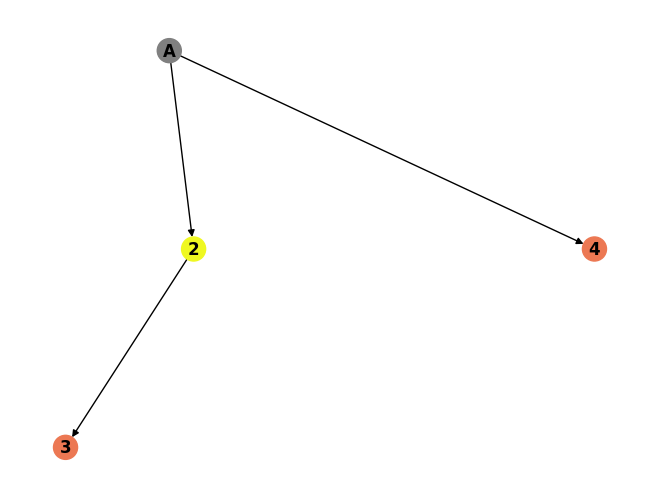

In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import tensorcraft as tc

from tensorcraft.viz.program_graph import draw_program_graph, draw_expression_graph

join_and_split_axis_program = tc.compile("""
B[(ijk)] = A[i,j,k]
C[i,j] = B[(ij)]                                       
Row[j] = A[0,j,k]
""")

A = np.random.randn(3, 4, 5)
print(A)
B = join_and_split_axis_program.tensor_expressions[2]({"A": A})
print(B)
C = join_and_split_axis_program.tensor_expressions[3]({"B": B}, output_shape_hint=(6, 10))
print(C)
Row = join_and_split_axis_program.tensor_expressions[4]({"A": A})
print(Row)

tc.viz.draw_program_graph(join_and_split_axis_program)

Positioning nodes


[('A', ['0', 'j'])]

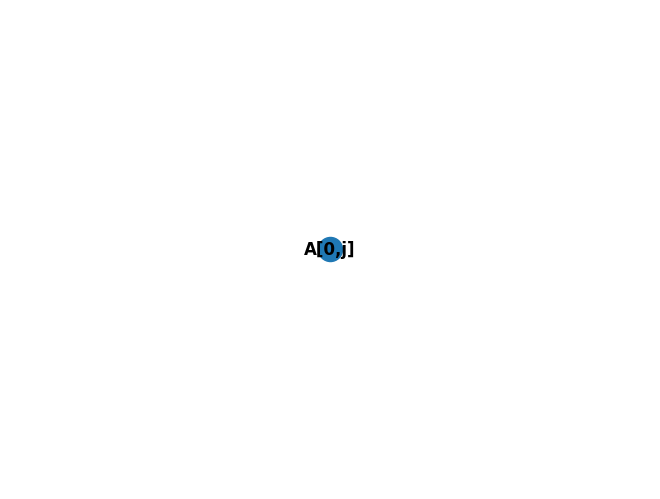

In [2]:
exp = 4
tc.viz.draw_expression_graph(join_and_split_axis_program.tensor_expressions[exp])
join_and_split_axis_program.tensor_expressions[exp].inputs

In [3]:
A = np.random.rand(3, 4)
B = 

SyntaxError: invalid syntax (335363103.py, line 2)

Positioning nodes


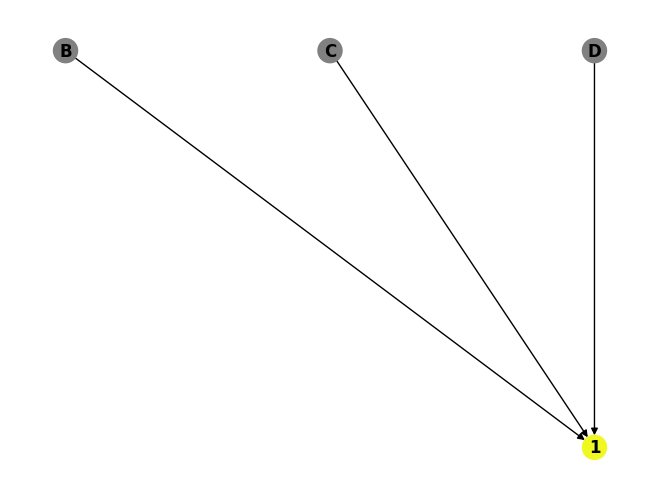

In [ ]:
small_program = tc.compile("A[i,j] = B[i,j] + B[j,i] + C[i] + D + i")
tc.viz.draw_program_graph(small_program)

Positioning nodes


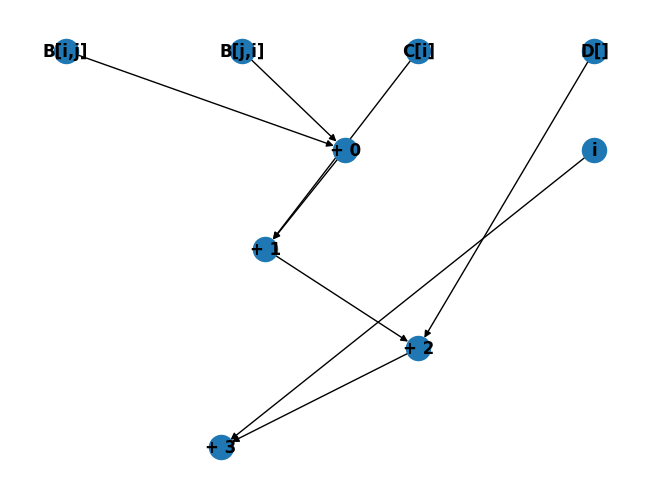

In [ ]:
tc.viz.draw_expression_graph(small_program.tensor_expressions[1])

In [ ]:

B = np.ones((10,10))
C = np.ones(10) + 10
expected = B + B.T + C + 100 + np.arange(10).reshape(-1,1)
result = small_program.tensor_expressions[1]({'B': B, 'C': C, 'D': 100})
print(expected)
print(result)
np.all(result == expected)

[[113. 113. 113. 113. 113. 113. 113. 113. 113. 113.]
 [114. 114. 114. 114. 114. 114. 114. 114. 114. 114.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [116. 116. 116. 116. 116. 116. 116. 116. 116. 116.]
 [117. 117. 117. 117. 117. 117. 117. 117. 117. 117.]
 [118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
 [119. 119. 119. 119. 119. 119. 119. 119. 119. 119.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
 [121. 121. 121. 121. 121. 121. 121. 121. 121. 121.]
 [122. 122. 122. 122. 122. 122. 122. 122. 122. 122.]]
[[113. 113. 113. 113. 113. 113. 113. 113. 113. 113.]
 [114. 114. 114. 114. 114. 114. 114. 114. 114. 114.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [116. 116. 116. 116. 116. 116. 116. 116. 116. 116.]
 [117. 117. 117. 117. 117. 117. 117. 117. 117. 117.]
 [118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
 [119. 119. 119. 119. 119. 119. 119. 119. 119. 119.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
 [121. 121. 121. 121. 121. 121. 121. 121. 121

np.True_

In [ ]:
min_red_program = tc.compile("""
Min[j] = 10000
Min[j] = (X[i,j] < Min[j]) * (X[i,j] - Min[j])
""")

X = np.random.randn(200,10)
expected = X.min(axis=0)
print(expected)

min_init = min_red_program.tensor_expressions[2]({}, output_shape_hint=(10,))
print(min_init)
min_result = min_red_program.tensor_expressions[3]({'X': X, 'Min': min_init})
print(min_result)
print(np.all(min_result == expected))



[-2.81631969 -2.81392023 -2.93091674 -2.77003165 -2.45127751 -2.97897276
 -2.73724268 -2.29883415 -2.84852649 -3.24144238]
[10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]
[-2.81631969 -2.81392023 -2.93091674 -2.77003165 -2.45127751 -2.97897276
 -2.73724268 -2.29883415 -2.84852649 -3.24144238]
True


Positioning nodes


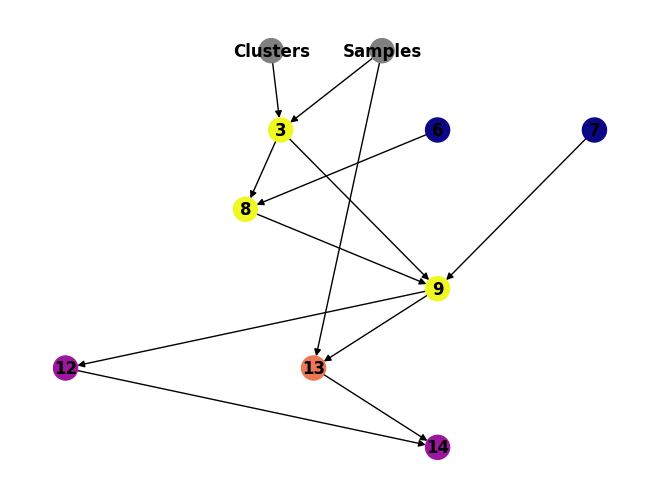

In [ ]:
code = """
# Distance computation
Dist[j,k] = (Samples[j,l] - Clusters[k,l]) * (Samples[j,l] - Clusters[k,l])

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] = (Dist[j,k] < Min[j]) * (Dist[j,k] - Min[j])
Labels[j] = (Dist[j,k] == Min[j]) * (k - Labels[j])

# Cluster update
Count[l] = (Labels[j] == l)
Update[l,k] = Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

draw_program_graph(kmeans_kernel, color_by="opcount")

In [ ]:
kmeans_kernel.tensor_expressions[3].op_graph.nodes

NodeView(('Samples[j,l]', 'Clusters[k,l]', '- 0', '- 1', '* 0'))

Positioning nodes


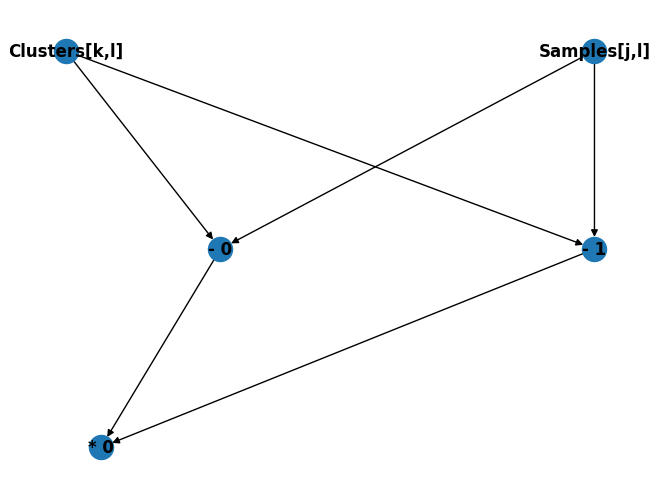

In [ ]:
draw_expression_graph(kmeans_kernel.tensor_expressions[3])

Positioning nodes


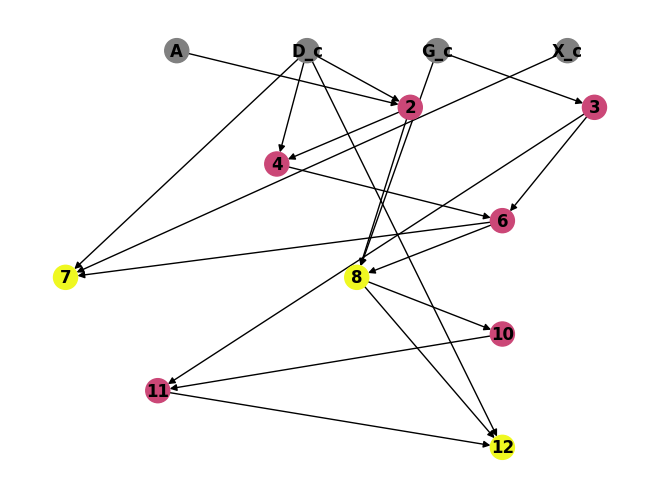

In [ ]:
code = """
W_c[i] = A[i,j] * D_c[j]
Gamma_c = G_c[i] * G_c[i]
Theta_c = D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + (Alpha_c * D_c[i])
G_n[i] = G_c[i] + (Alpha_c * W_c[i])

Gamma_n = G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n = (Beta_n * D_c[i]) - G_n[i]
"""
conjugate_gradient_kernel = tc.compile(code)

draw_program_graph(conjugate_gradient_kernel, color_by='opcount')


Positioning nodes


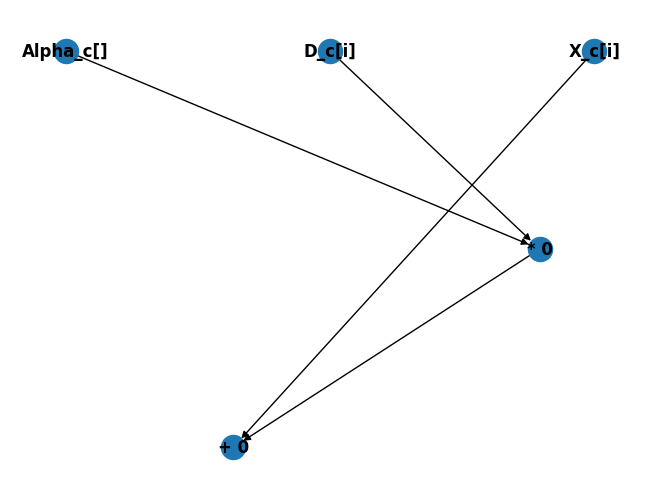

In [ ]:
draw_expression_graph(conjugate_gradient_kernel.tensor_expressions[7])

In [ ]:
a = eval("1 + 2")

In [ ]:
import networkx as nx
graph = nx.Graph()
graph.add_node(1, neg=True)
graph.add_node(2, neg=False)
for node in graph:
    print(nx.get_node_attributes(graph, 'neg')[node])

True
False


In [ ]:
print(True + True + False)

2
